Matias Medrano Ascencio

Domingo 8 de octubre del 2023

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np

def f1(x):
    return np.exp(x)*np.log10(x)

def f2(x):
    return np.sin(x)*np.log(x)

In [2]:
import pandas as pd

N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación 1", "Error 1", "Aproximación 2", "Error 2"], index = N)

In [3]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b - a)

In [4]:
for i in N:
    aproximacion1 = montecarlo(f1, int(i), 1, 3)
    table.loc[i, "Aproximación 1"] = aproximacion1
    table.loc[i, "Error 1"] = abs(6.09207 - aproximacion1)
    aproximacion2 = montecarlo(f2, int(i), 1, 3)
    table.loc[i, "Aproximación 2"] = aproximacion2
    table.loc[i, "Error 2"] = abs(0.869844 - aproximacion2)

In [5]:
table

,Aproximación 1,Error 1,Aproximación 2,Error 2
10.0,8.348792,2.256722,0.914206,0.044362
100.0,6.608065,0.515995,0.834444,0.0354
1000.0,6.031191,0.060879,0.854408,0.015436
10000.0,6.043638,0.048432,0.871218,0.001374
100000.0,6.08847,0.0036,0.867063,0.002781


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [6]:
def area(x,y):
    return x**2 + 2*y**2 <= - 2*x + 8*y - 7

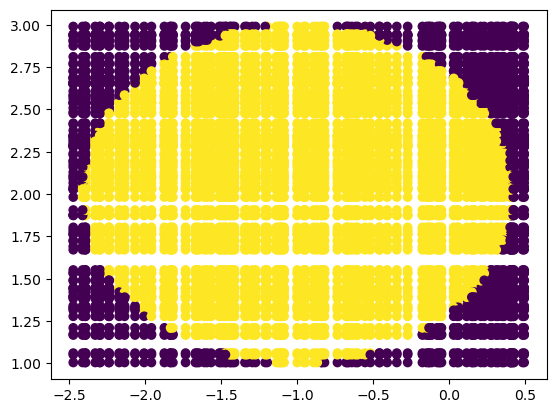

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-2.5, 0.5, 100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=area(X, Y))

Tras varios casos de prueba y error para definir la zona a delimitar, se encuentran los límites tanto en $x$ como en $y$ que delimitan la figura.

$a_1 = -2.5 $

$b_1 = 0.5 $

$a_2 = 1 $

$b_2 = 3 $

In [8]:
def montecarlo2(region, xA, xB, yA, yB, N):
    x = np.random.uniform(xA, xB, N)
    y = np.random.uniform(yA, yB, N)
    B = region(x, y)
    AR = (xB - xA)*(yB - yA)
    return np.mean(B)*AR

In [9]:
Num = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=["Área aproximada", "Error relativo"], index = Num)

In [12]:
a1 = -2.5
b1 = 0.5
a2 = 1
b2 = 3

AR = (b1-a1)*(b2-a2)
for i in Num:
    area_aprox = montecarlo2(area, -2.5, 0.5, 1, 3, int(i))
    table.loc[i, "Área aproximada"] = area_aprox
    Crel = ((1-area_aprox/AR)/(area_aprox/AR))**(1/2)
    er = np.log10(Crel) - np.log(i)/2
    table.loc[i, "Error relativo"] = er
table

,Área aproximada,Error relativo
10.0,4.2,-1.335281
100.0,4.14,-2.476329
1000.0,4.56,-3.704179
10000.0,4.4058,-4.825911
100000.0,4.4406,-5.983705


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería (ingeniería civil)

1. El método Montecarlo se utiliza frecuentemente para el análisis de riesgo del cronograma y costo en proyectos de ingeniería civil, especialmente de la mano de software como Microsoft Excel, Microsoft Project y el complemento @Risk. Se consideran intervalos de confianza para eventos de riesgo, y poder así conocer la cantidad de recursos monetarios y tiempo que presenta un proyecto. A final de cuentas permite optimizar procesos de gestión de proyectos al estimar presupuestos y plazos de realización de trabajos, lo que facilita la planificación y organización entre ingenieros, arquitectos y constructores.

2. Los métodos de integración y simulación Montecarlo se pueden utilizar para obtener estados de fuerza provocados por diferentes escenarios dentro del análisis de carga de una estructura, como por ejemplo, un puente. Esta metodología parte de la calibración dinámica de un modelo de elemento finito a través de pruebas dinámicas, usando información estadística según el caso (para el caso de un puente se toma información de pesos, configuración vehicular y ocupación del puente). Tras generar escenarios de carga viva, se calculan distribuciones estadísticas de los esfuerzos y se verifica dentro de las normativas de diseño correspondientes. Este procedimiento es especialmente útil para analizar si puentes preexistentes son capaces de soportar la carga que reciben actualmente.

3. La integración Montecarlo igualmente se puede aplicar dentro de algunas áreas específicas relacionadas a la ingeniería civil, tales como en la generación de energías renovables para poder analizar la producción de energía previsto de un parque eólico durante su vida útil con cierto nivel de incertidumbre, o el diseño de diagramas de flujo y riesgo cuantitativo del procesamiento de minerales en la geometalurgia.

## Referencias

- Castañon et al. (2015). *Método Montecarlo*. Zona Económica. https://www.zonaeconomica.com/metodo-monte-carlo
- Chávez et al. (2013). *Simulación Monte Carlo de las cargas vivas en el puente Barranca Honda para la obtención de las proyecciones estadísticas de esfuerzos y ciclos de carga*. Instituto Mexicano del Transporte. https://www.imt.mx/archivos/publicaciones/publicaciontecnica/pt387.pdf
- Flores, F. A. (2015). *APLICACIÓN DEL MÉTODO DE MONTE CARLO EN LA PLANIFICACIÓN DE PROYECTOS DE INGENIERÍA CIVIL*. Universidad de Chile. file:///C://Aplicacion-del-metodo-de-monte-carlo-en-la-planificacion-de-.pdf